In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.compat import lzip
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'Your primary involvement with data is in entering data',
       'Your primary involvement with data is in preparing visualizations',
       'Your primary/major involvement with data is in understanding what happened in past or what is happening',
       'Your primary/major involvement with data is in using data to predict what may happen',
       'My organization has central warehouse to store all data',
       'My organization has one point of contact for all database related queries',
       'My organizati

In [4]:
df['How many FTE are in your organization?'] = df['How many FTE are in your organization?'].replace(0, 1).to_frame()
print(df['How many FTE are in your organization?'].value_counts())
#print(df.head())

1      23
3      23
2      22
4      16
7      11
       ..
74      1
273     1
63      1
194     1
83      1
Name: How many FTE are in your organization?, Length: 129, dtype: int64


In [5]:
df['turnover_per_FTE'] = df['What was your firm’s turnover in the last calendar year? (in €)'] / df['How many FTE are in your organization?']

In [6]:
df['turnover_per_FTE'] = df['turnover_per_FTE'].round(2).astype(float)
print(df['turnover_per_FTE'].sort_values())

110         42.02
95          46.78
26          87.25
215        103.45
243        121.83
          ...    
341    4086500.00
388    4339500.00
41     5382000.00
8      8124000.00
4      8303000.00
Name: turnover_per_FTE, Length: 389, dtype: float64


In [7]:
df.to_csv('new_dataset_FTE.csv', index=False)

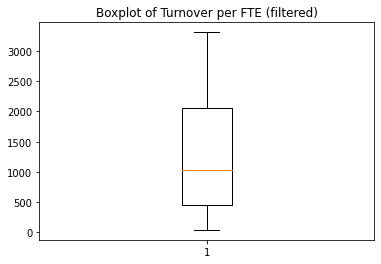

Number of excluded values: 0


In [8]:
# Subset the dataframe with the 50 smallest values
smallest_50 = df.nsmallest(50, 'turnover_per_FTE')

# Calculate mean and standard deviation
mean = np.mean(smallest_50['turnover_per_FTE'])
std = np.std(smallest_50['turnover_per_FTE'])

# Define a threshold for excluding small values
threshold = mean - 2 * std  # Example: 2 standard deviations below the mean

# Exclude data points with very small values
filtered_data = smallest_50[smallest_50['turnover_per_FTE'] >= threshold]

# Visualize filtered data (optional)
import matplotlib.pyplot as plt

plt.boxplot(filtered_data['turnover_per_FTE'])
plt.title('Boxplot of Turnover per FTE (filtered)')
plt.show()

# Exclude the filtered data points from the original dataset
df = df[~df.index.isin(filtered_data.index)]
# Calculate the number of excluded values
excluded_count = len(smallest_50) - len(filtered_data)

# Print the number of excluded values
print("Number of excluded values:", excluded_count)

In [9]:
print(df['turnover_per_FTE'].sort_values())
print(df.shape)

252       3463.41
164       3901.10
234       4000.00
182       4000.00
371       4000.00
          ...    
341    4086500.00
388    4339500.00
41     5382000.00
8      8124000.00
4      8303000.00
Name: turnover_per_FTE, Length: 339, dtype: float64
(339, 57)


In [10]:
df.to_csv('new_dataset.csv', index=False)

In [10]:
print(df['What was your firm’s turnover in the last calendar year? (in €)'].head())

0     209000
1    1860000
2    4278000
3    6556000
4    8303000
Name: What was your firm’s turnover in the last calendar year? (in €), dtype: int64


In [11]:
# Descriptive statistics of the dependent variable
dep_var_stats = df['What was your firm’s turnover in the last calendar year? (in €)'].describe()
print(dep_var_stats)

count    3.390000e+02
mean     2.481897e+06
std      2.335351e+06
min      2.100000e+04
25%      7.750000e+05
50%      1.541000e+06
75%      3.503500e+06
max      9.947000e+06
Name: What was your firm’s turnover in the last calendar year? (in €), dtype: float64


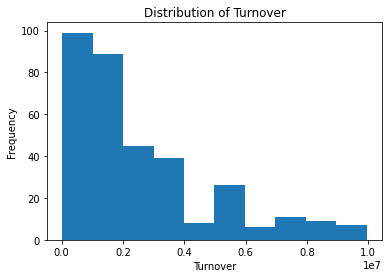

In [12]:
# Histogram of the dependent variable
plt.hist(df['What was your firm’s turnover in the last calendar year? (in €)'], bins=10)
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Distribution of Turnover')
plt.show()

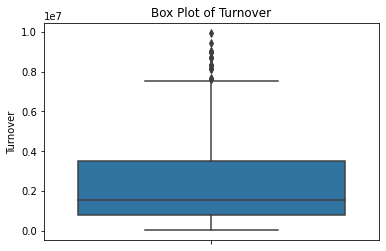

In [13]:
# Box plot of the dependent variable
sns.boxplot(y='What was your firm’s turnover in the last calendar year? (in €)', data=df)
plt.ylabel('Turnover')
plt.title('Box Plot of Turnover')
plt.show()

In [14]:
#indepedent variables creation 
df['avg_inv'] = df[['Your primary involvement with data is in entering data', 'Your primary involvement with data is in preparing visualizations', 'Your primary/major involvement with data is in understanding what happened in past or what is happening', 'Your primary/major involvement with data is in using data to predict what may happen']].mean(axis=1)
print(df['avg_inv'])
df['avg_inf'] = df[['My organization has central warehouse to store all data', 'My organization has one point of contact for all database related queries', 'My organization has one point of contact for all data analysis related queries', 'We have access to cloud computing platform (Azure/AWS/GCP/Digital Ocean)']].mean(axis=1)
print(df['avg_inf'])
df['avg_tools'] = df[['Extent to which spreadsheets (Excel/Libreoffice Cal/gnumeric etc.) are used in the organization', 'Extent to which prepreitory mathematical/statistical softwares (Matlab/SPSS etc.) are used in the organization', 'Extent to which statistical programming languages (R/Python/Scala) are used in the organization', 'Extent to which data visualization softwares (PowerBI/Tableau/Periscope etc.) are used in your organization']].mean(axis=1)
print(df['avg_tools'])
df['avg_open'] = df[['My organization is cooperating with external parties in the area of data.', 'The distance between data specialists and other staff is small.', 'Making mistakes in analyzing data is used to learn and improve', 'My organization stimulates experiments with new technology.', 'My organization shares data with other parties.']].mean(axis=1)
print(df['avg_open'])
df['avg_ds'] = df[['My organization uses product/service sales data', 'My organization uses financial data', 'My organization uses customer data (orders/subscriptions etc.)', 'My organization uses employee data']].mean(axis=1)
print(df['avg_ds'])
df['avg_comp'] = df[['There are plenty of opportunities to develop data skills', 'The management is aware of the possibilities of data', 'New (data) technologies are introduced quickly and smoothly', 'Support with problems related to data are well arranged']].mean(axis=1)
print(df['avg_comp'])
df['avg_dq'] = df[['I am confident that the data is relevant within my organization', 'I am confident that the data within my organization is accurate', 'I am confident that the data within my organization is up to date / recent', 'I am confident that the data within my organization is complete']].mean(axis=1)
print(df['avg_dq'])
df['avg_inn'] = df[['My organization strives for the rapid adoption of novelties in the field of data', 'My colleagues often bring new ideas and developments in the field of data to the table', 'The leadership is keen to capitalize on new developments in data immediately', 'Promising developments regarding data are quickly addressed', 'My organization has the resources and opportunities to quickly implement new developments']].mean(axis=1)
print(df['avg_inn'])
df['avg_safe'] = df[['Within my organization everyone uses the same software (Microsoft Office, Salesforce, Microsoft Dynamics, etc.)', 'My organization is aware of the importance of data security']].mean(axis=1)
print(df['avg_safe'])
df['avg_priv'] = df[['Within my organization, awareness of data ethics and privacy is highly developed', 'My organization is aware of the law and regulations regarding data (e.g. the GDPR)']].mean(axis=1)
print(df['avg_priv'])
df['avg_cult'] = df[['I have the resources to work on data-related projects in addition to my normal tasks', 'I know how to find help online for solving data-related issues (e.g. on forums or discussion groups)']].mean(axis=1)
print(df['avg_cult'])
df['avg_know'] = df[['What is your knowledge level of data visualization tools?', 'What is your knowledge level of Structured Query Language (SQL or similar)', 'What is your knowledge level of Application Prgramming Interface (API)', 'What is your knowledge level of file sharing services (Dropbox/onedrive etc.)', 'What is your knowledge level of artificial intelligence (reinforment learning)']].mean(axis=1)
print(df['avg_know'])
df['avg_soc'] = df[['When new data becomes available, I immediately use it to revise my position', 'I always strictly adhere to the applicable laws and regulations regarding data (e.g. the GDPR)']].mean(axis=1)
print(df['avg_soc'])
df['self_asses'] = df['Based on these five levels of data maturity, how would you rate your organization?'] 

0      2.25
1      1.00
2      1.25
3      4.50
4      4.00
       ... 
384    1.50
385    1.25
386    1.75
387    1.25
388    2.00
Name: avg_inv, Length: 339, dtype: float64
0      3.75
1      3.75
2      3.75
3      4.75
4      4.75
       ... 
384    1.75
385    2.25
386    2.00
387    2.00
388    2.50
Name: avg_inf, Length: 339, dtype: float64
0      3.25
1      3.75
2      3.25
3      3.50
4      3.75
       ... 
384    3.25
385    3.25
386    3.25
387    2.75
388    2.50
Name: avg_tools, Length: 339, dtype: float64
0      2.6
1      3.4
2      2.6
3      3.8
4      2.2
      ... 
384    4.0
385    4.0
386    4.2
387    3.0
388    3.6
Name: avg_open, Length: 339, dtype: float64
0      3.25
1      3.25
2      3.00
3      4.00
4      4.00
       ... 
384    3.50
385    4.25
386    3.00
387    3.75
388    2.25
Name: avg_ds, Length: 339, dtype: float64
0      3.50
1      1.75
2      3.75
3      3.25
4      3.50
       ... 
384    3.25
385    3.00
386    3.50
387    3.50
388    3.00
Na

In [15]:
columns_to_exclude = ['Your primary involvement with data is in entering data', 'Your primary involvement with data is in preparing visualizations', 'Your primary/major involvement with data is in understanding what happened in past or what is happening', 'Your primary/major involvement with data is in using data to predict what may happen', 
'My organization has central warehouse to store all data', 'My organization has one point of contact for all database related queries', 'My organization has one point of contact for all data analysis related queries', 'We have access to cloud computing platform (Azure/AWS/GCP/Digital Ocean)', 
'Extent to which spreadsheets (Excel/Libreoffice Cal/gnumeric etc.) are used in the organization', 'Extent to which prepreitory mathematical/statistical softwares (Matlab/SPSS etc.) are used in the organization', 'Extent to which statistical programming languages (R/Python/Scala) are used in the organization', 'Extent to which data visualization softwares (PowerBI/Tableau/Periscope etc.) are used in your organization', 
'My organization is cooperating with external parties in the area of data.', 'The distance between data specialists and other staff is small.', 'Making mistakes in analyzing data is used to learn and improve', 'My organization stimulates experiments with new technology.', 'My organization shares data with other parties.', 
'My organization uses product/service sales data', 'My organization uses financial data', 'My organization uses customer data (orders/subscriptions etc.)', 'My organization uses employee data', 
'There are plenty of opportunities to develop data skills', 'The management is aware of the possibilities of data', 'New (data) technologies are introduced quickly and smoothly', 'Support with problems related to data are well arranged', 
'I am confident that the data is relevant within my organization', 'I am confident that the data within my organization is accurate', 'I am confident that the data within my organization is up to date / recent', 'I am confident that the data within my organization is complete', 
'My organization strives for the rapid adoption of novelties in the field of data', 'My colleagues often bring new ideas and developments in the field of data to the table', 'The leadership is keen to capitalize on new developments in data immediately', 'Promising developments regarding data are quickly addressed', 'My organization has the resources and opportunities to quickly implement new developments', 
'Within my organization everyone uses the same software (Microsoft Office, Salesforce, Microsoft Dynamics, etc.)', 'My organization is aware of the importance of data security', 
'Within my organization, awareness of data ethics and privacy is highly developed', 'My organization is aware of the law and regulations regarding data (e.g. the GDPR)',
'I have the resources to work on data-related projects in addition to my normal tasks', 'I know how to find help online for solving data-related issues (e.g. on forums or discussion groups)', 
'What is your knowledge level of data visualization tools?', 'What is your knowledge level of Structured Query Language (SQL or similar)', 'What is your knowledge level of Application Prgramming Interface (API)', 'What is your knowledge level of file sharing services (Dropbox/onedrive etc.)', 'What is your knowledge level of artificial intelligence (reinforment learning)', 
'When new data becomes available, I immediately use it to revise my position', 'I always strictly adhere to the applicable laws and regulations regarding data (e.g. the GDPR)', 
'Based on these five levels of data maturity, how would you rate your organization?']
df = df.drop(columns=columns_to_exclude)






In [16]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'turnover_per_FTE', 'avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses'],
      dtype='object')


In [17]:
indpendent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']

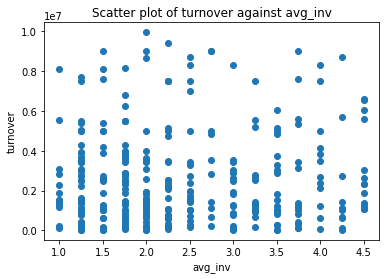

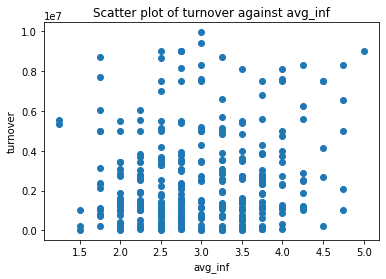

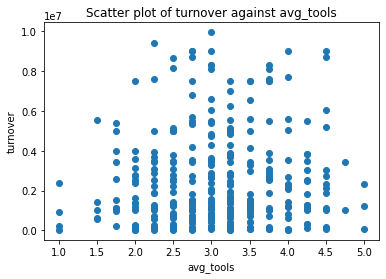

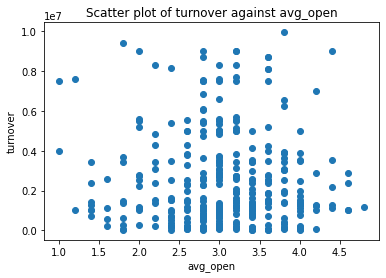

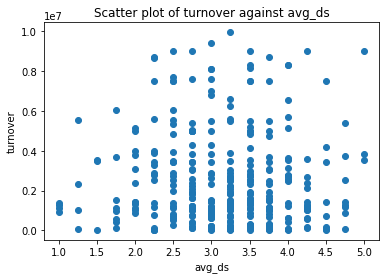

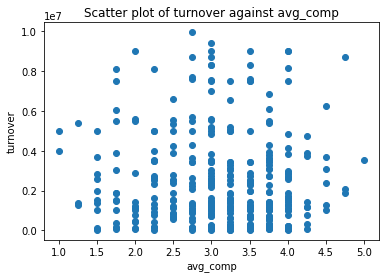

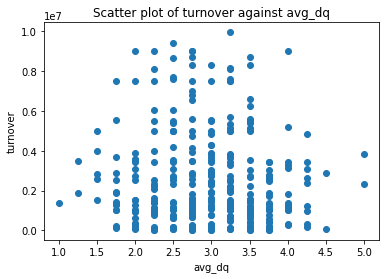

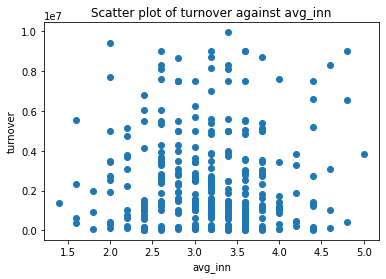

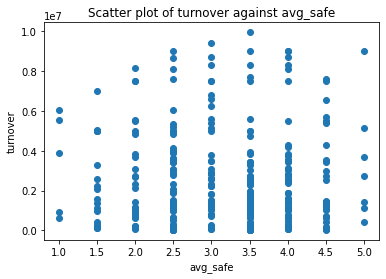

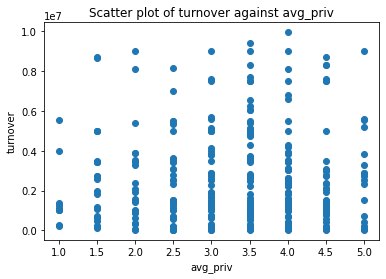

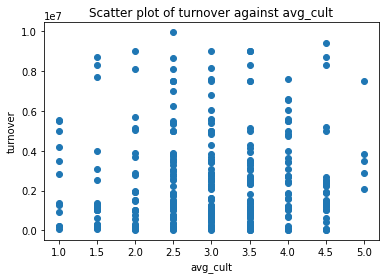

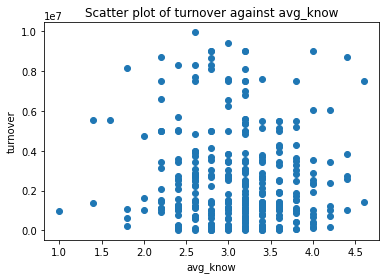

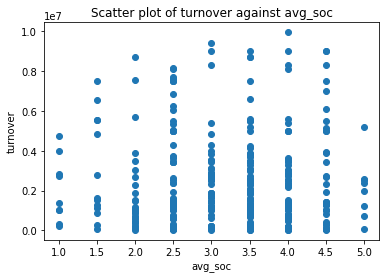

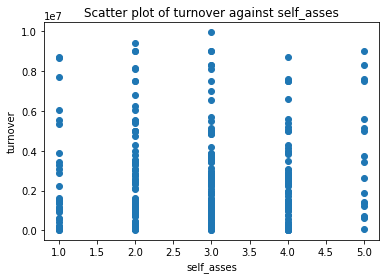

In [18]:
for var in indpendent_vars:
    # Create a scatter plot of the dependent variable against the current independent variable
    plt.scatter(df[var], df['What was your firm’s turnover in the last calendar year? (in €)'])
    plt.xlabel(var)
    plt.ylabel('turnover')
    plt.title(f'Scatter plot of turnover against {var}')
    plt.show()

In [19]:
correlation_matrix = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']].corr()
print(correlation_matrix)

             avg_inv   avg_inf  avg_tools  avg_open    avg_ds  avg_comp  \
avg_inv     1.000000  0.265589   0.199013  0.073492  0.095456  0.148719   
avg_inf     0.265589  1.000000   0.230341  0.146036  0.234814  0.178116   
avg_tools   0.199013  0.230341   1.000000  0.500643  0.319941  0.107314   
avg_open    0.073492  0.146036   0.500643  1.000000  0.342461  0.122808   
avg_ds      0.095456  0.234814   0.319941  0.342461  1.000000  0.416071   
avg_comp    0.148719  0.178116   0.107314  0.122808  0.416071  1.000000   
avg_dq      0.193191  0.131984   0.181585  0.105177  0.264096  0.480939   
avg_inn     0.186366  0.136676   0.294208  0.211790  0.405531  0.258716   
avg_safe   -0.005914  0.161441   0.156703  0.183630  0.336788  0.144216   
avg_priv    0.152377  0.211168   0.251321  0.199575  0.409206  0.282890   
avg_cult    0.286329  0.310109   0.202234  0.119174  0.286084  0.313314   
avg_know   -0.072679 -0.006737   0.284788  0.226535  0.217543  0.057773   
avg_soc     0.005916  0.0

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Feature        VIF
0      avg_inv   8.475254
1      avg_inf  22.002643
2    avg_tools  26.352197
3     avg_open  27.602076
4       avg_ds  29.943786
5     avg_comp  25.668618
6       avg_dq  29.676868
7      avg_inn  35.030762
8     avg_safe  17.737435
9     avg_priv  16.901048
10    avg_cult  16.108210
11    avg_know  35.660010
12     avg_soc  18.307675
13  self_asses  11.894679


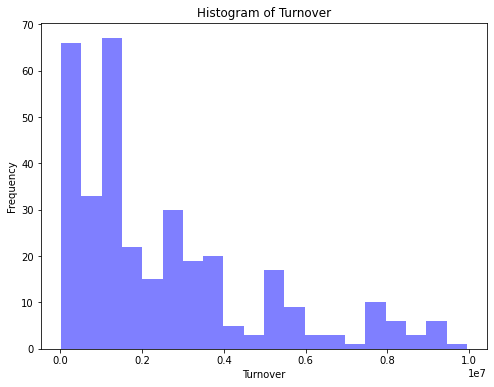

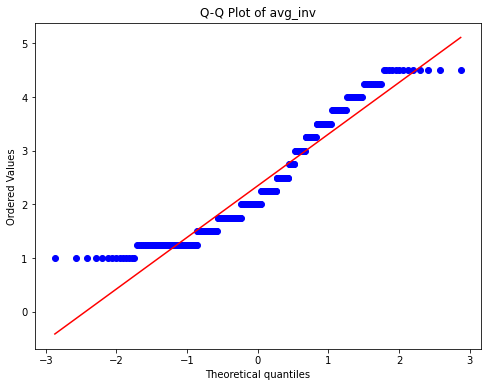

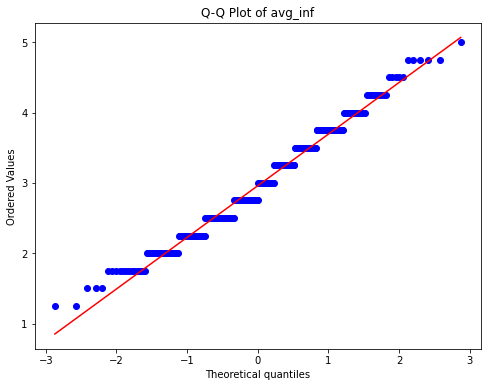

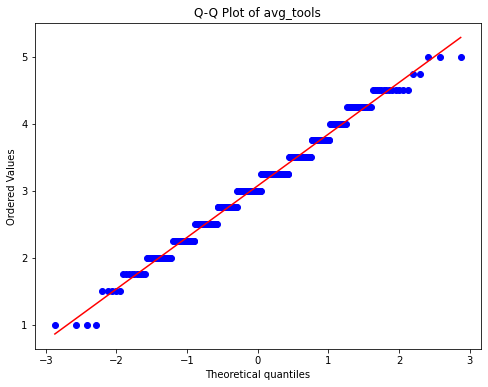

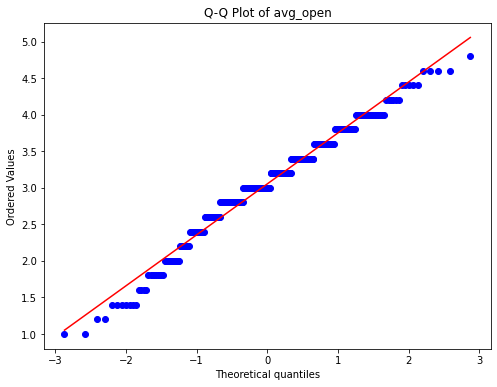

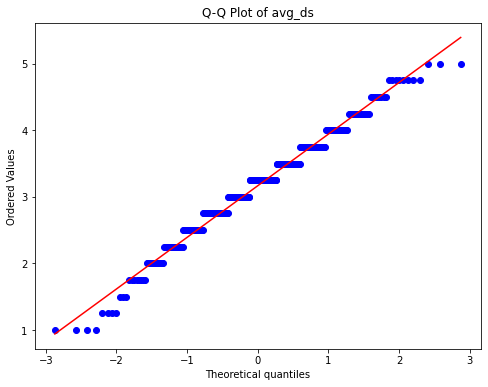

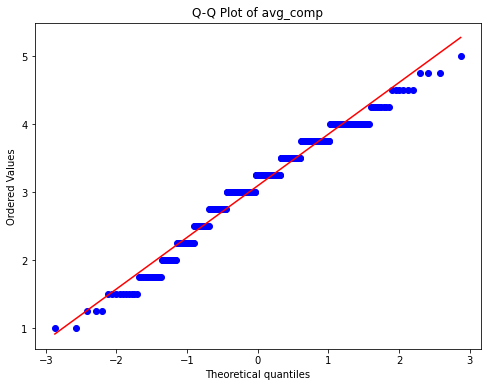

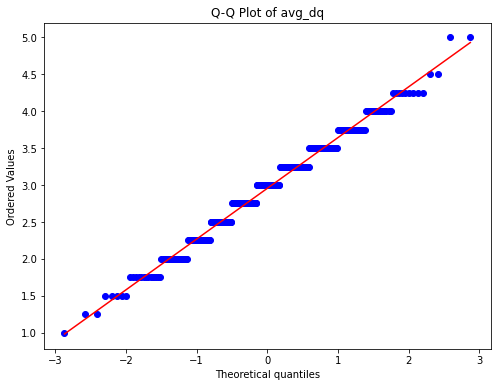

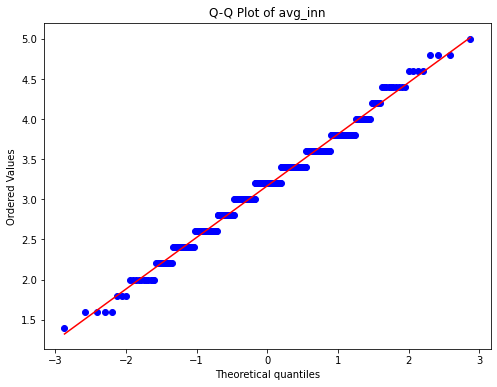

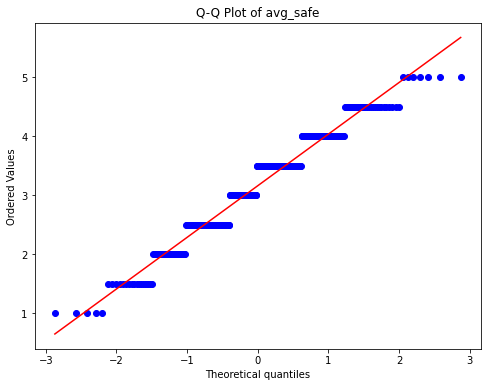

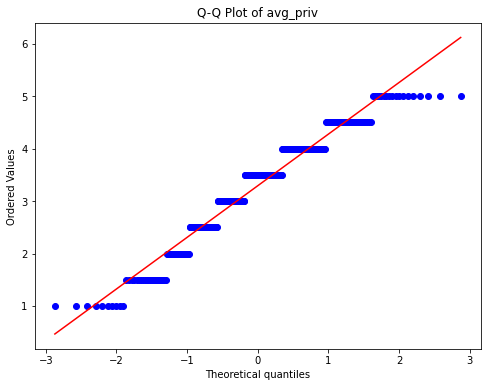

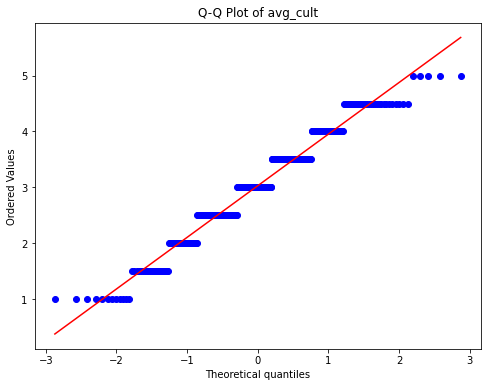

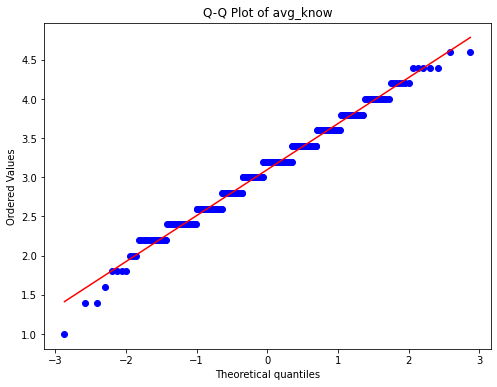

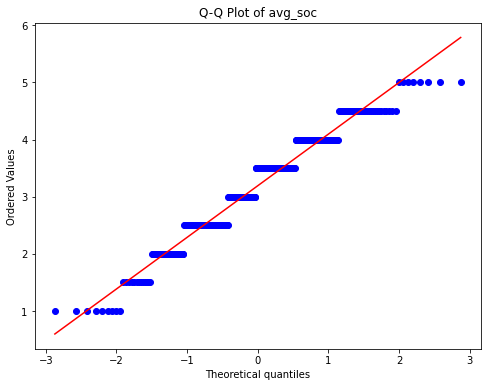

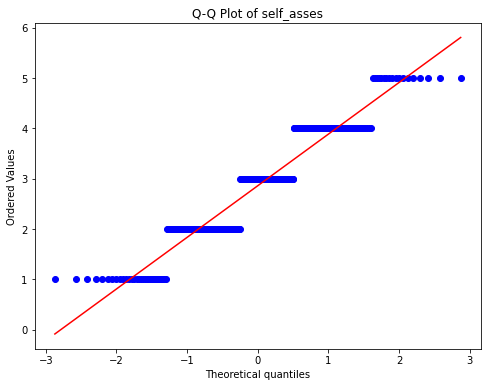

Shapiro-Wilk test for avg_inv: p-value = 7.484971843718657e-13
Shapiro-Wilk test for avg_inf: p-value = 7.61034752940759e-05
Shapiro-Wilk test for avg_tools: p-value = 0.003957902081310749
Shapiro-Wilk test for avg_open: p-value = 6.101264079916291e-05
Shapiro-Wilk test for avg_ds: p-value = 0.00075176713289693
Shapiro-Wilk test for avg_comp: p-value = 1.0190501598117407e-05
Shapiro-Wilk test for avg_dq: p-value = 0.002004885347560048
Shapiro-Wilk test for avg_inn: p-value = 0.006255731452256441
Shapiro-Wilk test for avg_safe: p-value = 7.744858976366231e-08
Shapiro-Wilk test for avg_priv: p-value = 3.265261838691913e-09
Shapiro-Wilk test for avg_cult: p-value = 1.932338307142345e-07
Shapiro-Wilk test for avg_know: p-value = 0.002590019488707185
Shapiro-Wilk test for avg_soc: p-value = 5.324575624854333e-08
Shapiro-Wilk test for self_asses: p-value = 1.947706183618933e-13


In [21]:
# Checking normality of the dependent variable (turnover)
plt.figure(figsize=(8, 6))
plt.hist(df['What was your firm’s turnover in the last calendar year? (in €)'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Histogram of Turnover')
plt.show()

# Checking normality of independent variables using Q-Q plots
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']  # Replace with your independent variables

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

# Checking normality of independent variables using Shapiro-Wilk test
for var in independent_vars:
    stat, p = stats.shapiro(df[var])
    print(f'Shapiro-Wilk test for {var}: p-value = {p}')

In [22]:
df['log_turnover'] = np.log(df['What was your firm’s turnover in the last calendar year? (in €)'] + 1)  # Adding 1 to avoid issues with zero values

# Verify the transformation
print(df['log_turnover'])

0      12.250094
1      14.436088
2      15.268996
3      15.695891
4      15.932128
         ...    
384    15.425748
385    14.180154
386    14.873648
387    15.053885
388    15.976417
Name: log_turnover, Length: 339, dtype: float64


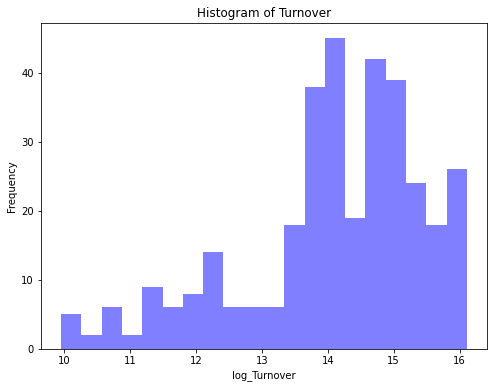

In [23]:
# Checking normality of the dependent variable (turnover)
plt.figure(figsize=(8, 6))
plt.hist(df['log_turnover'], bins=20, color='blue', alpha=0.5)
plt.xlabel('log_Turnover')
plt.ylabel('Frequency')
plt.title('Histogram of Turnover')
plt.show()

In [24]:
# Calculate summary statistics for 'My age'
age_stats = df['My age'].describe()

# Calculate summary statistics for 'My highest education'
education_stats = df['My highest education'].value_counts()

# Calculate summary statistics for 'In my function I carry managerial responsibility'
responsibility_stats = df['In my function I carry managerial responsibility (executive, end responsible, partner)'].value_counts()

# Calculate summary statistics for 'My enterprise is active in the following branch/industry'
industry_stats = df['My enterprise is active in the following branche/industry'].value_counts()

# Calculate summary statistics for 'Please indicate your company's age in years'
company_age_stats = df['Please indicate your company`s age in years'].describe()

# Calculate summary statistics for 'How many FTE are in your organization?'
fte_stats = df['How many FTE are in your organization?'].describe()

# Calculate summary statistics for 'What was your firm's turnover in the last calendar year? (in €)'
turnover_stats = df['What was your firm’s turnover in the last calendar year? (in €)'].describe()

# Calculate summary statistics for 'How much time do you spend on average per day working with data in your current role?'
#data_time_stats = df['How much time do you spend on average per day working with data in your current role'].describe()

# Print the summary statistics for each variable
print("Summary Statistics for 'My age':")
print(age_stats)
print()

print("Summary Statistics for 'My highest education':")
print(education_stats)
print()

print("Summary Statistics for 'In my function I carry managerial responsibility':")
print(responsibility_stats)
print()

print("Summary Statistics for 'My enterprise is active in the following branch/industry':")
print(industry_stats)
print()

print("Summary Statistics for 'Please indicate your company's age in years':")
print(company_age_stats)
print()

print("Summary Statistics for 'How many FTE are in your organization?':")
print(fte_stats)
print()

print("Summary Statistics for 'What was your firm's turnover in the last calendar year? (in €)':")
print(turnover_stats)
print()

#print("Summary Statistics for 'How much time do you spend on average per day working with data in your current role?':")
#print(data_time_stats)
#print()

Summary Statistics for 'My age':
count    339.000000
mean      45.000000
std       10.382621
min       20.000000
25%       35.000000
50%       45.000000
75%       55.000000
max       65.000000
Name: My age, dtype: float64

Summary Statistics for 'My highest education':
Master degree          140
Bachelor degree        108
Secondary education     85
Primary education        6
Name: My highest education, dtype: int64

Summary Statistics for 'In my function I carry managerial responsibility':
Yes    275
No      64
Name: In my function I carry managerial responsibility (executive, end responsible, partner), dtype: int64

Summary Statistics for 'My enterprise is active in the following branch/industry':
46    53
43    27
38    19
41    18
68    16
45    15
47    15
52    12
64    12
49    10
23     9
66     8
10     8
36     7
28     7
71     7
20     6
35     6
25     6
13     6
96     6
11     4
84     4
93     4
62     3
77     3
87     3
88     3
16     3
73     3
61     2
14     2
31  

In [25]:
# Fit multiple regression model
X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc', 'self_asses']]
y = df['log_turnover']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Extract the residuals
residuals = results.resid

# Fit an auxiliary regression model to test for heteroscedasticity
auxiliary_model = sm.OLS(residuals ** 2, sm.add_constant(X))
auxiliary_results = auxiliary_model.fit()

# Extract the necessary statistics
nobs = results.nobs
R_squared = results.rsquared
R_squared_aux = auxiliary_results.rsquared

# Calculate the test statistic and p-value
test_statistic = (R_squared_aux - R_squared) * nobs
p_value = chi2.sf(test_statistic, len(X.columns))

# Print the results
print("Breusch-Pagan Test:")
print(f"Test Statistic: {test_statistic}")
print(f"p-value: {p_value}")

Breusch-Pagan Test:
Test Statistic: -5.059358403819824
p-value: 1.0


c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Independent variables (X) and dependent variable (y)
X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']]
y = df['log_turnover']

# Create and fit the multiple regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.08012738  0.12844217  0.13572396 -0.10114318 -0.09372406 -0.0342168
 -0.14678497 -0.11786897  0.02462227  0.01476229  0.08680898 -0.01104225
  0.02739196]
Intercept: 14.185771156020596


In [32]:
df.rename(columns={'My enterprise is active in the following branche/industry': 'industry',
                   'Please indicate your company`s age in years': 'company_age',
                   'How many FTE are in your organization?': 'fte'}, inplace=True)


In [35]:
# Define the independent variables
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Define the control variables
control_vars = ['company_age', 'fte', 'industry']

# Encode the categorical variable 'industry'
df_encoded = pd.get_dummies(df, columns=['industry'], drop_first=True)

# Create the feature matrix X by combining the independent variables and control variables
X = df_encoded[independent_vars + control_vars]

# Create the target variable y
y = df_encoded['log_turnover']

# Fit the multiple regression model
model = LinearRegression()
model.fit(X, y)

# Retrieve the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

KeyError: "['industry'] not in index"

In [33]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'industry', 'company_age', 'fte',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'turnover_per_FTE', 'avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses', 'log_turnover'],
      dtype='object')


In [36]:
# Add a constant term to the independent variables
X = sm.add_constant(df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']])
Y = df['log_turnover']

# Add the moderator variable
X['fte'] = df['fte']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.954
Date:                Tue, 20 Jun 2023   Prob (F-statistic):             0.0208
Time:                        00:08:47   Log-Likelihood:                -575.45
No. Observations:                 339   AIC:                             1181.
Df Residuals:                     324   BIC:                             1238.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2019      0.613     23.175      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# Specify the independent variables
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Specify the moderator variable
moderator_var = 'company_age'

# Specify the dependent variable
dependent_var = 'log_turnover'

# Create the feature matrix X with the independent and moderator variables
X = df_encoded[independent_vars + [moderator_var]]

# Create the target variable y
y = df_encoded[dependent_var]

# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7179
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.756
Time:                        00:17:46   Log-Likelihood:                -584.01
No. Observations:                 339   AIC:                             1198.
Df Residuals:                     324   BIC:                             1255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.1755      0.629     22.550      

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
# Add a constant term to the independent variables
X = sm.add_constant(df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']])
Y = df['log_turnover']

# Add the moderator variable
X['company_age'] = df['company_age']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7179
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.756
Time:                        00:20:13   Log-Likelihood:                -584.01
No. Observations:                 339   AIC:                             1198.
Df Residuals:                     324   BIC:                             1255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.1755      0.629     22.550      

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# Encode the categorical variable 'sector' using dummy variables
df_encoded = pd.get_dummies(df, columns=['industry'], drop_first=True)

# Define the independent variables, dependent variable, and moderator
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']
dependent_var = 'log_turnover'
moderator_var = df['industry']

# Create the feature matrix X by combining the independent variables and the encoded moderator variables
X = df_encoded[independent_vars + list(df_encoded.columns[df_encoded.columns.str.startswith('industry_')])]

# Create the target variable y
y = df_encoded[dependent_var]

# Add a constant term to the feature matrix X
X = sm.add_constant(X)

# Create the linear regression model with the moderator
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.253
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.106
Time:                        00:24:36   Log-Likelihood:                -541.19
No. Observations:                 339   AIC:                             1224.
Df Residuals:                     268   BIC:                             1496.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.6421      1.467     10.661      

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
sector_counts = df['industry'].value_counts()
print(sector_counts)

46    53
43    27
38    19
41    18
68    16
45    15
47    15
52    12
64    12
49    10
23     9
66     8
10     8
36     7
28     7
71     7
20     6
35     6
25     6
13     6
96     6
11     4
84     4
93     4
62     3
77     3
87     3
88     3
16     3
73     3
61     2
14     2
31     2
22     2
18     2
81     2
24     2
70     2
58     1
63     1
27     1
17     1
56     1
55     1
85     1
42     1
26     1
1      1
69     1
30     1
90     1
21     1
74     1
86     1
91     1
29     1
82     1
94     1
Name: industry, dtype: int64
